# 4.KNN实践作业

## 1.完成移动客户流失或大学生恋爱数据的KNN分析，并与逻辑回归进行对比、评价。

**具体要求如下**

**（1）两个数据任选一个分析，要求是完整的数据分析流程**

**（2）代码在此文档中完成**

**（3）在逻辑回归三人合作完成的分析报告基础上添加与KNN模型的对比分析，并完成分析报告（背景、数据介绍、描述分析、模型思想、模型构建、模型对比分析、结论及建议，格式：宋体、小四、1.5倍行距）**



In [1]:
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### （1）读入数据

In [57]:
import pandas as pd
# 读入数据
data = pd.read_csv('F:/大三（上）/机器学习/4.实践作业/4.2实践作业/大学生恋爱数据.csv',encoding='gbk')
data.head()

,是否恋爱,年级,性别,是否追求过别人,是否被别人追求过,每周自习时间,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,...,乐器,其他才艺,家乡,成绩水平,生活费_百元,寝室同学是否谈过恋爱,身高,体重,是否戴眼镜,颜值
0,否,大四,男,否,否,50,45,70,0,70,...,否,是,3三线城市,30,13,是,170,59.0,是,0
1,否,大三,男,否,否,5,45,63,5,0,...,是,否,3三线城市,10,7,是,171,70.0,是,0
2,否,大三,女,否,否,6,4,60,1,30,...,否,是,3三线城市,60,12,是,160,61.0,是,5
3,否,大四,女,是,是,16,11,56,10,38,...,否,是,1一线城市,31,8,是,162,50.0,是,6
4,否,大四,男,否,否,35,25,42,5,40,...,否,是,5农村,55,10,是,175,72.0,是,5


### （2）特征处理

In [58]:
# 分类变量编码
data['年级']=data['年级'].astype(str)
class_data=pd.get_dummies(data[['年级','性别','是否追求过别人','是否被别人追求过','班干部','党员','足球','篮球','乒乓球','羽毛球','跑步','台球','唱歌','主持','舞蹈','乐器','其他才艺','家乡','寝室同学是否谈过恋爱','是否戴眼镜']], drop_first=True)
class_data.head() 

,年级_大三,年级_大二,年级_大四,性别_男,是否追求过别人_是,是否被别人追求过_是,班干部_是,党员_是,足球_是,篮球_是,...,主持_是,舞蹈_是,乐器_是,其他才艺_是,家乡_2二线城市,家乡_3三线城市,家乡_4县级市,家乡_5农村,寝室同学是否谈过恋爱_是,是否戴眼镜_是
0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
2,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,1
3,0,0,1,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,1


In [59]:
# 数值变量数据标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_data=scaler.fit_transform(data[['每周自习时间','每周娱乐时间','每周睡觉时间','每周运动时间','每月话费','学生组织个数','成绩水平','生活费_百元','身高','体重','颜值']])
num_data=pd.DataFrame(num_data,columns=['每周自习时间','每周娱乐时间','每周睡觉时间','每周运动时间','每月话费','学生组织个数','成绩水平','生活费_百元','身高','体重','颜值'])
num_data.head()

,每周自习时间,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,学生组织个数,成绩水平,生活费_百元,身高,体重,颜值
0,2.395950,2.153485,1.485031,-1.237865,0.468947,-1.729630,-0.512603,-0.536855,0.073876,-0.094679,-2.570115
1,-1.109443,2.153485,0.836022,-0.229260,-2.042964,-1.729630,-1.251739,-0.783533,0.183198,0.812161,-2.570115
2,-1.031545,-0.895763,0.557876,-1.036144,-0.966431,0.627494,0.596102,-0.577968,-1.019343,0.070201,-0.499038
3,-0.252569,-0.375159,0.187013,0.779346,-0.679355,1.216774,-0.475646,-0.742420,-0.800699,-0.836640,-0.084822
4,1.227485,0.666047,-1.111005,-0.229260,-0.607586,-1.140349,0.411318,-0.660194,0.620486,0.977041,-0.499038


In [60]:
#数据拼接
data_new=pd.concat([data['是否恋爱'],class_data,num_data],axis=1)
data_new.head()

,是否恋爱,年级_大三,年级_大二,年级_大四,性别_男,是否追求过别人_是,是否被别人追求过_是,班干部_是,党员_是,足球_是,...,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,学生组织个数,成绩水平,生活费_百元,身高,体重,颜值
0,否,0,0,1,1,0,0,1,0,0,...,2.153485,1.485031,-1.237865,0.468947,-1.729630,-0.512603,-0.536855,0.073876,-0.094679,-2.570115
1,否,1,0,0,1,0,0,0,0,0,...,2.153485,0.836022,-0.229260,-2.042964,-1.729630,-1.251739,-0.783533,0.183198,0.812161,-2.570115
2,否,1,0,0,0,0,0,1,1,0,...,-0.895763,0.557876,-1.036144,-0.966431,0.627494,0.596102,-0.577968,-1.019343,0.070201,-0.499038
3,否,0,0,1,0,1,1,1,0,0,...,-0.375159,0.187013,0.779346,-0.679355,1.216774,-0.475646,-0.742420,-0.800699,-0.836640,-0.084822
4,否,0,0,1,1,0,0,0,0,0,...,0.666047,-1.111005,-0.229260,-0.607586,-1.140349,0.411318,-0.660194,0.620486,0.977041,-0.499038


### （3）拆分数据集

In [61]:
from sklearn.model_selection import train_test_split

X = data_new.drop('是否恋爱', axis=1)
y = data_new.是否恋爱
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=52)

In [62]:
X_train.shape

(263, 36)

In [63]:
X_test.shape

(30, 36)

### （4）构建KNN模型

In [64]:
#使用K-NN对训练集数据进行训练
from sklearn import neighbors
from sklearn import metrics 

KNN_model = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
#对测试集进行预测
y_predict = KNN_model.predict(X_test)
y_predict_prob=KNN_model.predict_proba(X_test)[:,1]

In [66]:
metrics.roc_auc_score(y_test,y_predict_prob) #AUC

0.88

In [67]:
print('查准率','查全率','F1值：')
print(metrics.classification_report(y_test,y_predict))

查准率 查全率 F1值：
              precision    recall  f1-score   support

           否       0.60      0.60      0.60         5
           是       0.92      0.92      0.92        25

    accuracy                           0.87        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.87      0.87      0.87        30



In [68]:
print('混淆矩阵：')
print(metrics.confusion_matrix(y_test,y_predict)) 

混淆矩阵：
[[ 3  2]
 [ 2 23]]


In [69]:
data_new.head()

,是否恋爱,年级_大三,年级_大二,年级_大四,性别_男,是否追求过别人_是,是否被别人追求过_是,班干部_是,党员_是,足球_是,...,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,学生组织个数,成绩水平,生活费_百元,身高,体重,颜值
0,否,0,0,1,1,0,0,1,0,0,...,2.153485,1.485031,-1.237865,0.468947,-1.729630,-0.512603,-0.536855,0.073876,-0.094679,-2.570115
1,否,1,0,0,1,0,0,0,0,0,...,2.153485,0.836022,-0.229260,-2.042964,-1.729630,-1.251739,-0.783533,0.183198,0.812161,-2.570115
2,否,1,0,0,0,0,0,1,1,0,...,-0.895763,0.557876,-1.036144,-0.966431,0.627494,0.596102,-0.577968,-1.019343,0.070201,-0.499038
3,否,0,0,1,0,1,1,1,0,0,...,-0.375159,0.187013,0.779346,-0.679355,1.216774,-0.475646,-0.742420,-0.800699,-0.836640,-0.084822
4,否,0,0,1,1,0,0,0,0,0,...,0.666047,-1.111005,-0.229260,-0.607586,-1.140349,0.411318,-0.660194,0.620486,0.977041,-0.499038


In [70]:
y_test

159    是
262    是
136    是
6      否
169    是
181    是
220    是
244    是
76     否
127    是
229    是
62     否
161    是
222    是
114    是
280    是
1      否
204    是
231    是
79     否
94     是
269    是
289    是
83     是
221    是
205    是
167    是
243    是
168    是
196    是
Name: 是否恋爱, dtype: object

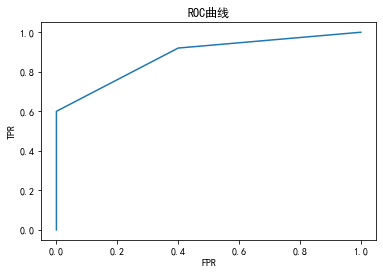

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob, pos_label= '是')
plt.plot(fpr, tpr) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()

### 结果分析 

In [76]:
feature_list=list(X_train.columns)
print(feature_list)

['年级_大三', '年级_大二', '年级_大四', '性别_男', '是否追求过别人_是', '是否被别人追求过_是', '班干部_是', '党员_是', '足球_是', '篮球_是', '乒乓球_是', '羽毛球_是', '跑步_是', '台球_是', '唱歌_是', '主持_是', '舞蹈_是', '乐器_是', '其他才艺_是', '家乡_2二线城市', '家乡_3三线城市', '家乡_4县级市', '家乡_5农村', '寝室同学是否谈过恋爱_是', '是否戴眼镜_是', '每周自习时间', '每周娱乐时间', '每周睡觉时间', '每周运动时间', '每月话费', '学生组织个数', '成绩水平', '生活费_百元', '身高', '体重', '颜值']


## 2.模仿参考代码，利用KNN模型，预测图片中人的性别（男或女）

### （1）前期准备 

In [25]:
import os
filePath = 'F:/大三（上）/机器学习/4.实践作业/4.2实践作业/二分类图'
items = os.listdir(filePath)

In [26]:
#为了避免有不是jpg格式的文件，有临时文件时可能会有问题，多做一步
namelist=[]
for name in items:
    if name.endswith(".jpg"):
        namelist.append(name)

In [27]:
len(namelist)

350

In [28]:
namelist[0] #355表示图片编号，后面的35表示人的类别

'0_male.jpg'

In [29]:
#需要将类别（输出）拆解出来
namelist[0][:-4].split("_")

['0', 'male']

### （2）读取图片，将图片作为特征X，将人的类别作为输出Y

In [34]:
from PIL import Image
import numpy as np
X=np.empty((0,4096))
n_pixels=64
for i in namelist:
    img=np.array(Image.open('F:/大三（上）/机器学习/4.实践作业/4.2实践作业/二分类图/'+i).convert('L'), 'f')
    img_new=img.reshape(1,4096)
    X=np.vstack((X,img_new)) 

In [35]:
X.shape 

(350, 4096)

In [36]:
X[:5]

array([[ 77.,  91., 104., ...,  25.,  15.,  30.],
       [ 68.,  39.,  43., ...,   0.,  13.,   0.],
       [ 25.,  47., 192., ...,  12.,  54.,  39.],
       [ 75.,  11.,  58., ...,   7.,  64.,  25.],
       [ 10., 165., 246., ...,   4.,   0.,   1.]])

In [37]:
y=[]
for i in namelist:
    people=i[:-4].split("_")[1]
    y.append(people) 

In [38]:
y=np.array(y)
y

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
      

### （3）划分训练集和测试集

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [40]:
X_train.shape

(346, 4096)

In [41]:
X_test.shape

(4, 4096)

### （4）构建KNN模型

In [44]:
#训练模型
from sklearn import neighbors
from sklearn import metrics 

KNN_model = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [45]:
#在测试集上验证
y_predict=KNN_model.predict(X_test) #输出分类结果

In [46]:
y_predict_prob=KNN_model.predict_proba(X_test)
y_predict_prob

array([[0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ]])

### （5）看模型效果

In [47]:
y_predict

array(['male', 'female', 'male', 'male'], dtype='<U6')

In [48]:
y_test

array(['male', 'female', 'male', 'male'], dtype='<U6')

In [49]:
print('混淆矩阵：')
print(metrics.confusion_matrix(y_test,y_predict)) 

混淆矩阵：
[[1 0]
 [0 3]]


从上面预测结果来看，预测非常准确